In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load csv file
df = pd.read_csv("C:/Users/HP/Downloads/Crop_data.csv")

# Assume last column is categorical output
X = df.iloc[:, :-1]   # first 7 columns → inputs
y = df.iloc[:, -1]    # last column → output

# Step 1: Normalize inputs (Min-Max Scaling between 0 and 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: One-hot encode output
encoder = OneHotEncoder(sparse=False, drop=None)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_encoded_df = pd.DataFrame(y_encoded, columns=encoder.get_feature_names_out([y.name]))

# Final preprocessed data
final_df = pd.concat([X_scaled_df, y_encoded_df], axis=1)
pd.set_option("display.max_columns",None)

print(final_df.head())             

          N         P      K  temperature  humidity        ph  rainfall  \
0  0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458   
1  0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675   
2  0.428571  0.357143  0.195     0.406854  0.793977  0.674219  0.875710   
3  0.528571  0.214286  0.175     0.506901  0.768751  0.540508  0.799905   
4  0.557143  0.264286  0.185     0.324378  0.785626  0.641291  0.871231   

   label_apple  label_banana  label_blackgram  label_chickpea  label_coconut  \
0          0.0           0.0              0.0             0.0            0.0   
1          0.0           0.0              0.0             0.0            0.0   
2          0.0           0.0              0.0             0.0            0.0   
3          0.0           0.0              0.0             0.0            0.0   
4          0.0           0.0              0.0             0.0            0.0   

   label_coffee  label_cotton  label_grapes  label_jute  label_kidne

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Decision Tree Accuracy: 0.9795
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00      

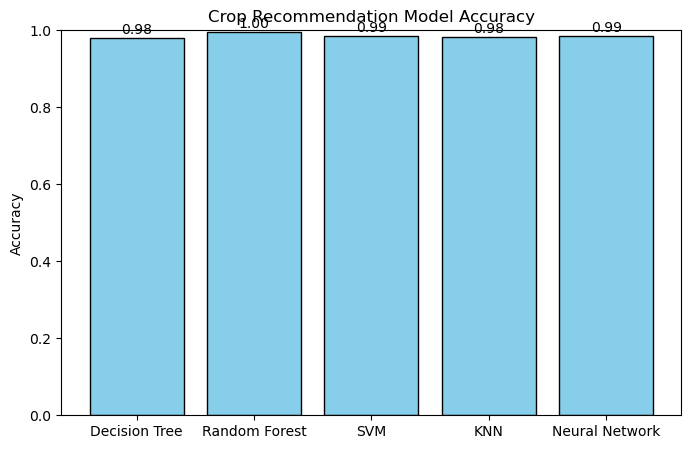

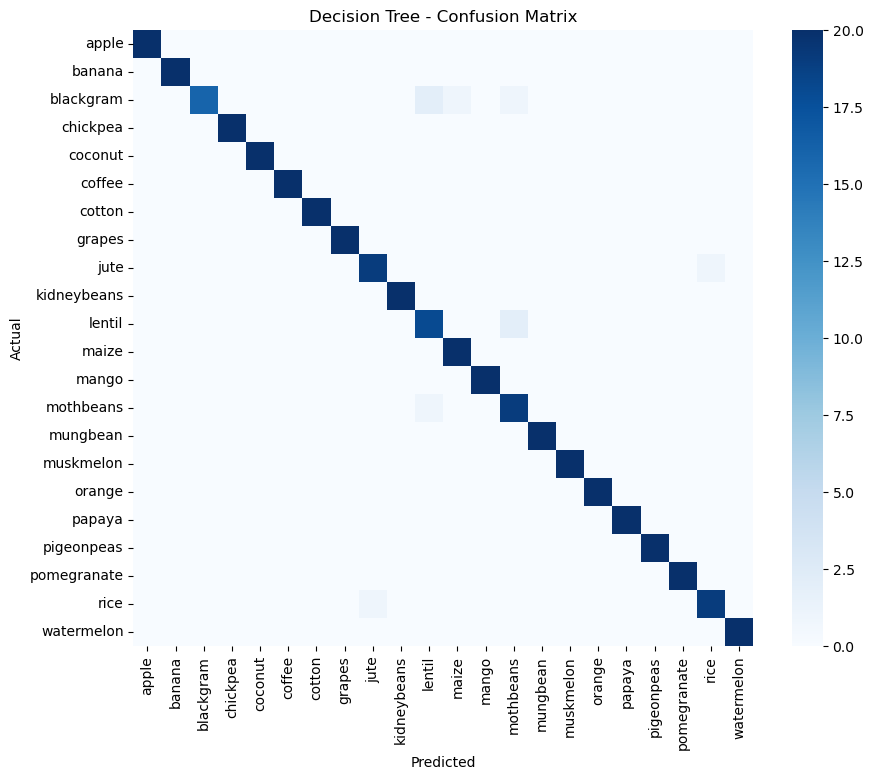

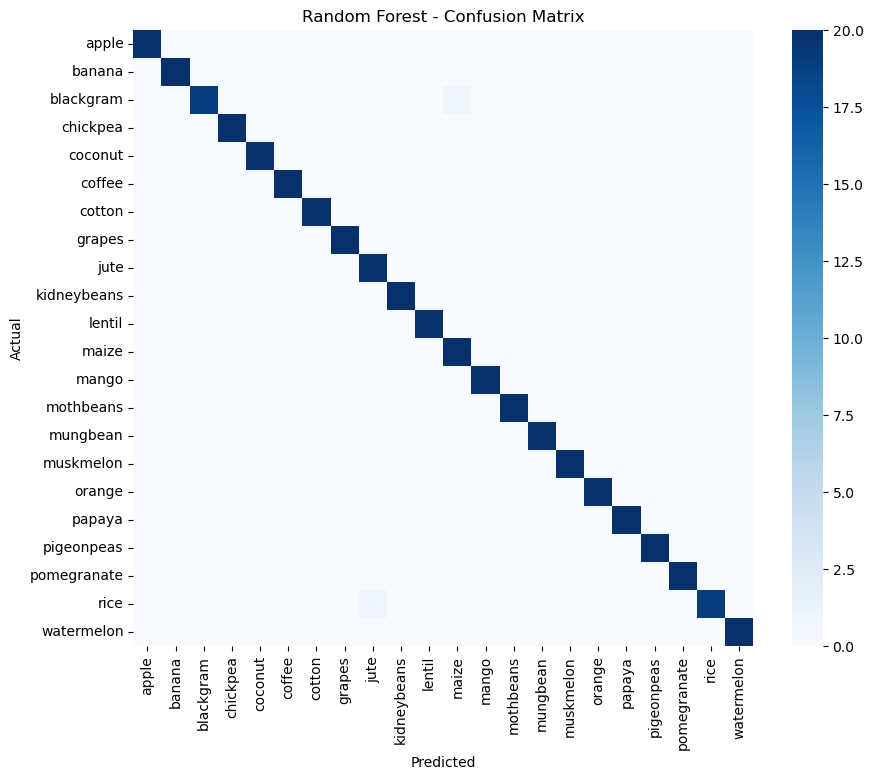

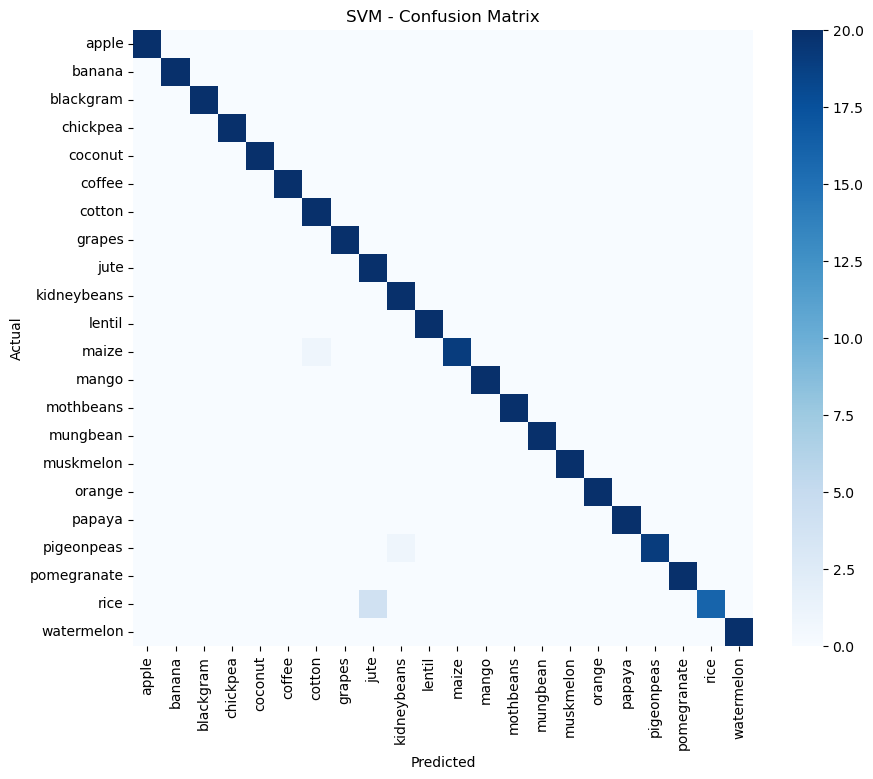

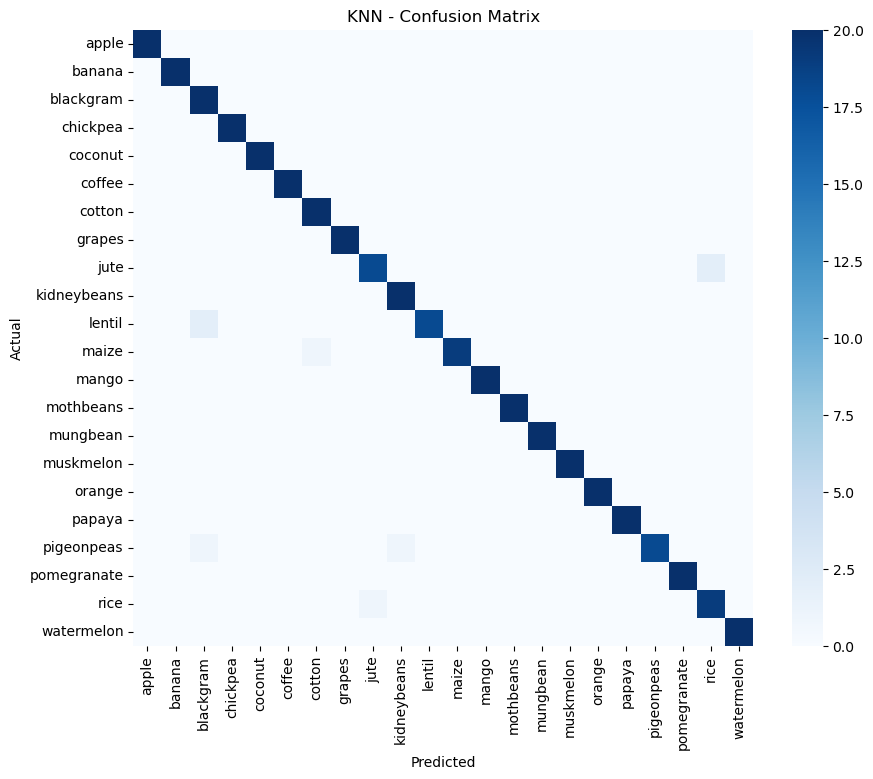

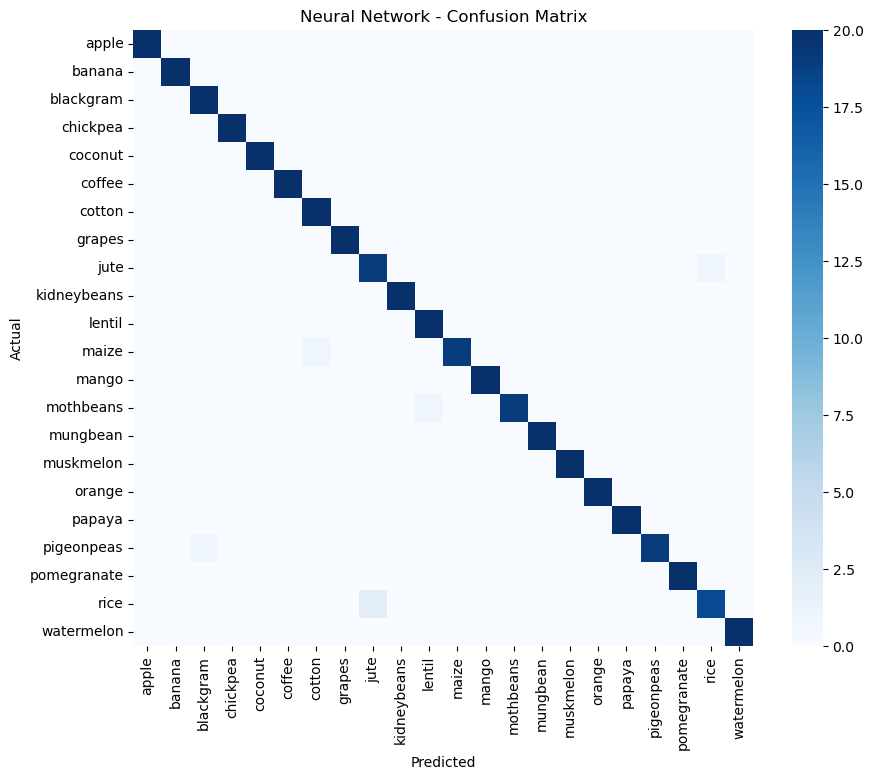


✅ Best Model: Random Forest with Accuracy = 0.9955


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/Crop_data.csv")

# 2. Split features (X) and target (y)
X = df.iloc[:, :-1]   # soil + climate features
y = df.iloc[:, -1]    # crop label

# 3. Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# 4. Normalize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Define models (added Decision Tree)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), 
                                    max_iter=500, random_state=42)
}

# 7. Train, evaluate and store results
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# 8. Print summary
print("\nModel Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# 9. Plot bar chart of accuracies
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='black')
plt.title("Crop Recommendation Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(results.values()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()

# 10. Plot confusion matrix heatmaps
for name, cm in conf_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, cmap="Blues", 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 11. Select and display best model
best_model = max(results, key=results.get)
best_acc = results[best_model]
print(f"\n✅ Best Model: {best_model} with Accuracy = {best_acc:.4f}")
